In [ ]:
pd.read_csv("scraped_data_single_page.csv")

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv("output.csv")

In [ ]:
pd.read_csv("new120.csv")

,Name,Title,Rating,Comment
0,Mohammed Abdul Rahman,Just buy this Beast.,4.0 out of 5 stars,"I dont know why some people giving less stars,..."
1,Mukesh leve,ZakaaaaaaaaaaaS,5.0 out of 5 stars,💝 Awesome mobile in this price.💝 Value of mone...
2,praveen,"Bad performance,",1.0 out of 5 stars,"Worst phone, lot of problems"
3,Amazon Customer,Performance is good,4.0 out of 5 stars,Battery:goodScreen:goodGaming:goodCamera:for c...
4,Soumalya,Heating problem,2.0 out of 5 stars,Huge heating problem. Right side of the camera...
...,...,...,...,...
4905,Kk,Perfect mobile for gaming+camera,5.0 out of 5 stars,It's is a amazing phone for gaming and camera ...
4906,Nikhil mehra,Best smartphone in this price segment,5.0 out of 5 stars,Best smartphone in this price segment. Best in...
4907,Amazon Customer,Must should buy product,5.0 out of 5 stars,"Awesome product at this price tag,never ever e..."
4908,imtiaz,Everything is fine but Voice problem,1.0 out of 5 stars,Everything is fine but calling voice problem


In [ ]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 12.6MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=ca6db21a94be5beb1c48225b229cc7e8de14c86a3fecfcdc73a77efe581a90f6
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora


# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("new120.csv")
df.head()

,Name,Title,Rating,Comment
0,Mohammed Abdul Rahman,Just buy this Beast.,4.0 out of 5 stars,"I dont know why some people giving less stars,Let me give my review after using since 15 days.Divided this review in pros and cons.Pros:1.Finger print and face unlock is super fast.2. Touch is smo..."
1,Mukesh leve,ZakaaaaaaaaaaaS,5.0 out of 5 stars,💝 Awesome mobile in this price.💝 Value of money🎁 Display : 5/5🎁 build quality : 5/5🎁 Camera : 5/5🎁 Buttery : 4.5/5🎁 Screen : 4/5🎁 Sound : 4.5/5🎁 Tuch : 4/5🎁 Performance : 4/5💐 All-over 4.2/5
2,praveen,"Bad performance,",1.0 out of 5 stars,"Worst phone, lot of problems"
3,Amazon Customer,Performance is good,4.0 out of 5 stars,Battery:goodScreen:goodGaming:goodCamera:for camera i will give 3.5While gaming it won't heat
4,Soumalya,Heating problem,2.0 out of 5 stars,Huge heating problem. Right side of the camera is heating without playing any game ...


In [ ]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

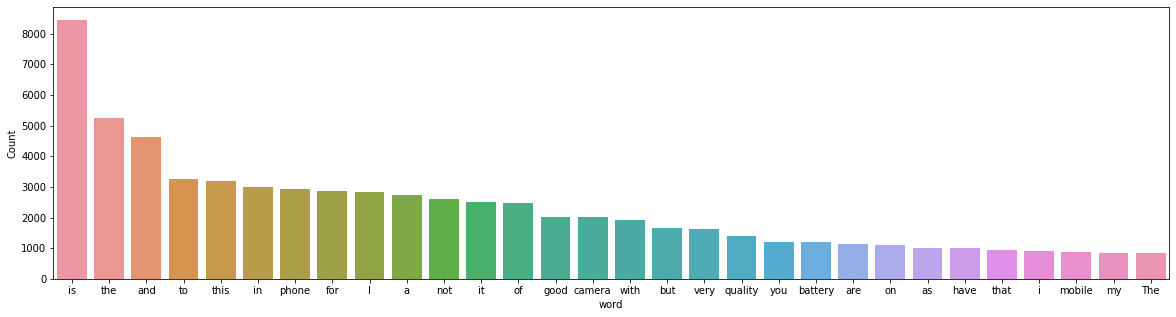

In [ ]:
freq_words(df['Comment'])

In [ ]:
# remove unwanted characters, numbers and symbols
df['Comment'] = df['Comment'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#print(stop_words)

REMOVING URL WORDS

In [ ]:
import re
def getWordsFromURL(url):
    return re.compile(r'[\:/?=\-&]+',re.UNICODE).split(url)

url = "https://www.amazon.in/Redmi-Note-Pro-Electric-phone-mobile/B07X2KLYSF"
words = getWordsFromURL(url)
extra_words = [r.lower() for r in words]
print(extra_words)
import re
# l = re.split(r"\W+","https://www.amazon.in/Apple-MacBook-Air-13-3-inch-MQD32HN/dp/B073Q5R6VR")
# print(l)
stop_words = stop_words + words + extra_words
# stop_words.append(words);
# stop_words.append(extra_words);
print(stop_words)

['https', 'www.amazon.in', 'redmi', 'note', 'pro', 'electric', 'phone', 'mobile', 'b07x2klysf']
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'mo

In [ ]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i.lower() not in stop_words])
    return rev_new

# remove short words (length < 3)
df['Comment'] = df['Comment'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['Comment']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

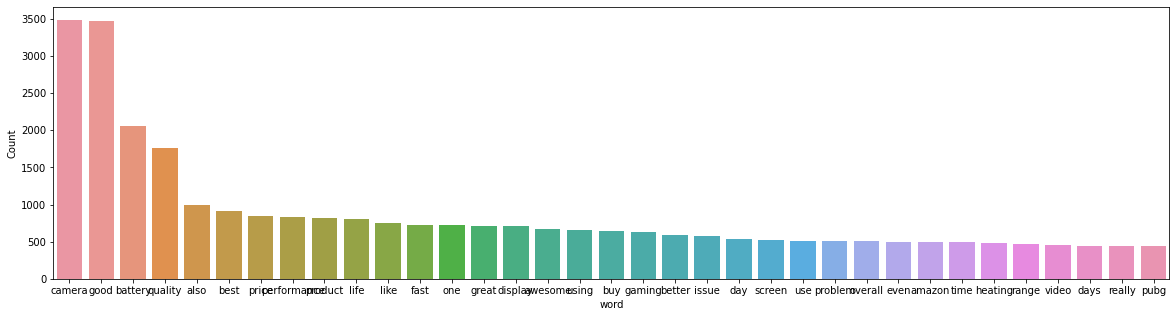

In [ ]:
freq_words(reviews, 35)

In [ ]:
!python -m spacy download en # one time run

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [ ]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['awesome', 'price', 'value', 'money', 'display', 'build', 'quality', 'camera', 'buttery', 'screen', 'sound', 'tuch', 'performance']


**Lemmatization**
To further remove noise from the text we can use lemmatization from the spaCy library. It reduces any given word to its base form thereby reducing multiple forms of a word to a single word.
we have not just lemmatized the words but also filtered only nouns and adjectives

In [ ]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[2]) # print lemmatized review

['bad', 'lot', 'problem']


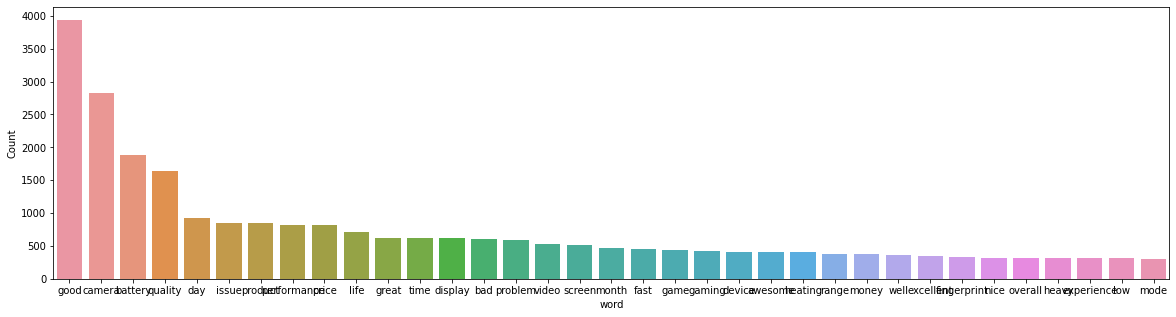

In [ ]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df['reviews'] = reviews_3

freq_words(df['reviews'], 35)

**LSA docterm matrix**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(df['reviews'])

X.shape # check shape of the document-term matrix

(4910, 1000)

**LDA docterm matrix**

In [ ]:
dictionary = corpora.Dictionary(reviews_2)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

***LSA***

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=7, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

7

**Printing LSA topics**

In [ ]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ", end='')
    for t in sorted_terms:
        print(t[0], end='')
        print(" ", end='')
    print('')

Topic 0: good camera quality battery price performance product 
Topic 1: good budget range mid compare requirement price 
Topic 2: product bad nice problem money value service 
Topic 3: quality camera bad video poor picture sound 
Topic 4: bad problem issue good heating time day 
Topic 5: battery life product nice day backup fingerprint 
Topic 6: money value nice performance camera heating issue 


**LDA model training**

In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=100)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
lda_model.print_topics()

[(0,
  '0.110*"good" + 0.048*"camera" + 0.035*"battery" + 0.035*"price" + 0.025*"performance" + 0.022*"quality" + 0.018*"great" + 0.017*"range" + 0.017*"gaming" + 0.015*"game"'),
 (1,
  '0.029*"device" + 0.028*"app" + 0.019*"issue" + 0.014*"ad" + 0.011*"center" + 0.010*"time" + 0.010*"problem" + 0.009*"update" + 0.008*"notification" + 0.007*"cover"'),
 (2,
  '0.071*"quality" + 0.063*"camera" + 0.054*"money" + 0.044*"good" + 0.036*"value" + 0.019*"poor" + 0.016*"well" + 0.013*"sound" + 0.012*"performance" + 0.011*"speaker"'),
 (3,
  '0.069*"camera" + 0.065*"good" + 0.055*"battery" + 0.033*"quality" + 0.025*"day" + 0.024*"life" + 0.017*"fingerprint" + 0.013*"fast" + 0.013*"finger" + 0.012*"mode"'),
 (4,
  '0.029*"card" + 0.023*"display" + 0.017*"memory" + 0.016*"slot" + 0.014*"purchase" + 0.013*"month" + 0.012*"sim" + 0.012*"delivery" + 0.012*"excellent" + 0.011*"price"'),
 (5,
  '0.041*"video" + 0.028*"issue" + 0.025*"time" + 0.023*"screen" + 0.016*"update" + 0.014*"call" + 0.013*"app" 

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.218387  0.009411       1        1  31.027862
3     -0.234696 -0.043143       2        1  26.404195
5      0.131008 -0.144474       3        1  10.224704
6      0.169612 -0.085916       4        1   9.729346
2     -0.142989  0.012987       5        1   9.053730
1      0.176691 -0.043831       6        1   8.942563
4      0.118762  0.294966       7        1   4.617601, topic_info=           Term         Freq        Total Category  logprob  loglift
13         good  3808.000000  3808.000000  Default  30.0000  30.0000
4        camera  2676.000000  2676.000000  Default  29.0000  29.0000
277     product   809.000000   809.000000  Default  28.0000  28.0000
31      quality  1566.000000  1566.000000  Default  27.0000  27.0000
50        price   774.000000   774.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
206         new    25.198140   120.542377   Topic7  -4.8375   1.5101
221       white    19.409362    54.142140   Topic7  -5.0985   2.0494
50        price    36.225902   774.341418   Topic7  -4.4745   0.0131
73        great    23.149631   582.289301   Topic7  -4.9223  -0.1497
150  experience    20.386481   288.274995   Topic7  -5.0494   0.4263

[472 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
279       5  0.977756          #
366       3  0.496416       able
366       4  0.466330       able
366       6  0.030086       able
726       6  0.893901  accessory
...     ...       ...        ...
46        2  0.221226    youtube
46        3  0.705158    youtube
46        6  0.069133    youtube
1177      1  0.153221       zoom
1177      3  0.827394       zoom

[724 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 6, 7, 3, 2, 5])

Creating the test data 

In [ ]:
testing = pd.DataFrame(['The performance differences between it and it\'s predecessor are marginal, at best ...Yet you are being asked to pay $2400 for membership. Think back to around 2015, when the previous gen entry cost was still $ 2000, then they changed it to $2400. For that, you got shafted with a crap keyboard, a failing display, an identity crisis for a touch-bar, and less connectivity.Now that this latest model came out and people are buying it, they are bolstering Apple\'s position: never apologize for hardware issues, make ppl pay extra for AppleCare+, give folks a real working keyboard and make it look like they are doing you a favor so the prices are .... what .... justified ?Apple\'s pricing schemes make you wonder if they think they can get ppl to believe that hardware is actually comparable to a commodity, or something like that.Lastly, you do not know what kind of quality issues lurk behind these new models ....',
                        'Maybe I just got unlucky, but the laptop I received never really worked. When going through the setup process, the computer was unable to load data from my Time Machine backup. I cancelled out of it in an attempt to complete the rest of the installation process. I had to shutdown and after that, the machine never worked again. During the boot phase it just cycled through the Apple logo/progress bar startup over and over and over again. It would almost reach the end and then stop and restart, but never fully booted. I returned it, but since it was processed through a third party, I had to pay a 15% restocking fee, so I only received 85% of what I initially paid. So I had to pay almost $400 for the pleasure of owning a broken Mac for a day. What a joy! I complained to the 3rd party and they said the laptop was fine which is baffling since I watched the machine try and boot for half and hour. I feel screwed. Maybe I just got a bad product, or maybe Apple has serious quality control issues. It\'s seriously making me think of giving up on Macs all together.'])

testing = pd.DataFrame([("Edit: The prices cha"
   "nge quite a bit, and"
   " Amazon doesn\'t do "
   "price-matching, so k"
   "eep an eye out for t"
   "hat. There\'s a webs"
   "ite that shows the l"
   "owest price for each"
   " configuration, so c"
   "heck that out first "
   "before buying. I end"
   "ed up returning my i"
   "7 MBP to get the i9 "
   "because 512GB of spa"
   "ce just isn\'t that "
   "much, and definitely"
   " wasn\'t enough for "
   "my purposes. Both ar"
   "e excellent machines"
   " and I\'m waiting to"
   " see how hot the i9 "
   "gets under sustained"
   " load.\r\n\r\n"
   "I used to have a lot"
   " of apple products, "
   "with my last macbook"
   " being the 2012 13 a"
   "nd 15\" macbook pros"
   ". I ended up giving "
   "those to friends as "
   "I transitioned to a "
   "new windows-based la"
   "ptop for college.\r"
   "\n\r\n"
   "7 years later, and I"
   " finally had a compe"
   "lling reason to purc"
   "hase the newest MBP:"
   " a normal keyboard, "
   "USB C, larger screen"
   ", and improved therm"
   "als. My main gripe w"
   "ith thin and light l"
   "aptops like the Dell"
   " XPS 13 and Thinkpad"
   " X1 Carbon (6th gen)"
   " has been that their"
   " thermals are awful."
   " My hands would burn"
   " up while typing, ev"
   "en after a good repa"
   "ste and undervolt. I"
   "t also didn\'t help "
   "that their screens w"
   "ere on the smaller s"
   "ide.\r\n\r\n"
   "I\'ve had the new MB"
   "P for a few days now"
   ". I bought the base "
   "model i7, and while "
   "I\'m enjoying it, I "
   "do wish I sprung for"
   " the i9 at the very "
   "least due to the 1TB"
   " of storage. I have "
   "handfuls of external"
   " storage, but it rea"
   "lly gets annoying to"
   " have to go through "
   "different drives whe"
   "n storage fills up. "
   "I do use more storag"
   "e than a typical use"
   "r IMO, as I typicall"
   "y have Bootcamp inst"
   "alled along with dif"
   "ferent CAD programs,"
   " IDEs, datasets, etc"
   ". However, I\'m sure"
   " the extra storage w"
   "ould be nice for any"
   "one.\r\n\r\n"
   "So far, the transiti"
   "on has been great! M"
   "y only issue so far "
   "has been the battery"
   " life - 10 to 11 hou"
   "rs is definitely a s"
   "tretch, and I person"
   "ally found myself ru"
   "nning out of battery"
   " after 4-5 hours of "
   "heavy multi-tasking,"
   " fans at a constant "
   "60% (basically inaud"
   "ible in a packed sta"
   "rbucks), at full bri"
   "ghtness, with a lot "
   "of external power-hu"
   "ngry peripherals. Ho"
   "nestly, that\'s not "
   "that bad!")])

testing = testing[0].str.replace("[^a-zA-Z#]", " ")
# print(testing)
# remove short words (length < 3)
testing = testing.apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
test_review = [remove_stopwords(r.split()) for r in testing]

# make entire text lowercase
test_review = [r.lower() for r in test_review]

tokenized_test_review = pd.Series(test_review).apply(lambda x: x.split())
reviews_2_test = lemmatization(tokenized_test_review)
print(reviews_2_test) # print lemmatized review

[['edit', 'price', 'bit', 'amazon', 'price', 'eye', 'website', 'low', 'price', 'configuration', 'buying', 'space', 'enough', 'purpose', 'excellent', 'machine', 'hot', 'get', 'load', 'lot', 'product', 'last', 'pro', 'friend', 'new', 'window', 'college', 'year', 'compelling', 'reason', 'purchase', 'new', 'normal', 'keyboard', 'usb', 'large', 'screen', 'thermal', 'main', 'gripe', 'thin', 'light', 'laptop', 'thermal', 'awful', 'hand', 'good', 'repaste', 'undervolt', 'screen', 'small', 'side', 'new', 'day', 'base', 'model', 'sprung', 'least', 'due', 'storage', 'handful', 'external', 'storage', 'annoying', 'different', 'drive', 'storage', 'storage', 'typical', 'user', 'different', 'program', 'dataset', 'sure', 'extra', 'storage', 'transition', 'great', 'issue', 'battery', 'life', 'hour', 'battery', 'hour', 'heavy', 'multi', 'fan', 'constant', 'inaudible', 'packed', 'starbuck', 'full', 'brightness', 'lot', 'external', 'power', 'hungry', 'peripheral', 'bad']]


In [ ]:
dictionary = corpora.Dictionary(reviews_2_test)
doc_term_matrix_test = [dictionary.doc2bow(rev) for rev in reviews_2_test]
print(pd.DataFrame(lda_model.get_document_topics(doc_term_matrix_test, minimum_phi_value=0.2,)))

NameError: ignored

In [ ]:
dictionary = corpora.Dictionary(reviews_2_test)
doc_term_matrix_test = [dictionary.doc2bow(rev) for rev in reviews_2_test]
print(pd.DataFrame(lda_model.get_document_topics(doc_term_matrix_test, minimum_phi_value=0.2,)))

                 0                1                 2
0  (0, 0.13318437)  (3, 0.83958554)  (5, 0.021499125)
